In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

# Market Trends in US real-estate market

Data is retrieved from [Zillow's Research data](https://www.zillow.com/research/data/) and following type from `Home Values` data.

Since we are interested in the market trends to decide which US real-estate market is doing best overall, initially getting the data of Top Tier Time Series data from Zillow's Home Values data.

As per Zillow's webpage, the ZHVI for Top Tier Time Series provides the home values within 65th to 95th percentile range for given region.

The options for the type of Geography is given as follows:
* Metro and U.S.
* State
* County
* City

We are going to perform analysis of `Metro & US` geography for Top Tier Time Series data with the following data types:
1. All Homes - Top Tier Time Series
2. Single-Family Homes Time Series

Note:
As per Zillow's webpage, the CSV files uploaded in the server are updated on the 12th of each month. The data used in this analysis was downloaded on 11/27/2024 which should have latest data for this project before the due.

## 1. Data Type: ZHVI All Homes - Top Tier Time Series($)
## Geography: Metro & U.S.

In [2]:
# load data into pandas dataframe
metro_us_top_tier = pd.read_csv("./Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv")

# display first five rows of data
metro_us_top_tier.head(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,236310.307821,236838.023959,237480.193801,238850.421544,240412.320519,...,6.617035e+05,6.627986e+05,6.656263e+05,6.696100e+05,6.731204e+05,6.746329e+05,6.752572e+05,6.759704e+05,6.773754e+05,6.789914e+05
1,394913,1,"New York, NY",msa,NY,422779.470763,424569.458990,426373.228624,430078.225391,433925.761544,...,1.040112e+06,1.044140e+06,1.051909e+06,1.061940e+06,1.070822e+06,1.075952e+06,1.079291e+06,1.083236e+06,1.087985e+06,1.091999e+06
2,753899,2,"Los Angeles, CA",msa,CA,408845.886049,410475.727683,412497.750632,416559.900109,420908.271857,...,1.538312e+06,1.531557e+06,1.529231e+06,1.535570e+06,1.546364e+06,1.551836e+06,1.557527e+06,1.564954e+06,1.576026e+06,1.585157e+06
3,394463,3,"Chicago, IL",msa,IL,294798.619006,295160.327624,295764.309500,297253.846121,298995.626064,...,5.029052e+05,5.050047e+05,5.087715e+05,5.132149e+05,5.164459e+05,5.179396e+05,5.185213e+05,5.194622e+05,5.209806e+05,5.227783e+05
4,394514,4,"Dallas, TX",msa,TX,234470.520983,234474.949985,234523.178926,234692.071349,234965.454079,...,6.038140e+05,6.057093e+05,6.088988e+05,6.120574e+05,6.134658e+05,6.129716e+05,6.114534e+05,6.104536e+05,6.104705e+05,6.112888e+05


In [3]:
# display last five rows of data
metro_us_top_tier.tail(5)   

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,221914.095432,220287.910570,220192.537576,222203.281152,224501.537093,225784.071770,225948.532152,225991.175537,226064.814808,225879.321361
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,548360.287886,547769.478967,550368.767534,552969.820826,555076.306477,554859.636217,553466.035413,553438.132178,555357.238979,558374.377510
892,753874,937,"Craig, CO",msa,CO,171168.872755,171482.922883,171861.387668,172285.233625,172695.40665,...,394896.584283,393944.116716,394206.291399,395435.448506,397281.736381,398265.278118,399296.985077,400193.153531,402053.971208,404091.754361
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,179575.371395,180865.594222,182899.970265,184752.274354,185410.355676,185072.435743,184340.334684,183551.676624,182053.962201,180243.174764
894,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,173196.777417,172352.641283,172959.096318,173663.574855,174270.220375,174816.753206,175129.003722,174897.405214,174250.740731,173417.359801


__Checking the types of data__

We are checking the datatypes for each columns to see if the datatypes that we are interested (in this case value of home in given datetime) is numerical.

If the columns of interests are not numerical, we would need to convert them to respective numerical datatypes such as int or float.

In [4]:
metro_us_top_tier.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 303, dtype: object

__Dropping irrelevant columns__

We are mostly interested in the `RegionName` and the home values in the specified region.
Hence, we are dropping the columns that are note relevant to our analysis, such as `RegionID`, `SizeRank`, `RegionType`, `StateName`.


In [5]:
metro_us_top_tier = metro_us_top_tier.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

__Setting RegionName as index__

For data analysis, we are setting `RegionName` as the index which will make it easier to work with numerical columns only as values.

In [6]:
metro_us_top_tier.set_index('RegionName', inplace=True)
metro_us_top_tier.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,236310.307821,236838.023959,237480.193801,238850.421544,240412.320519,242092.423675,243880.472278,245788.568877,247754.637581,249705.214888,...,6.617035e+05,6.627986e+05,6.656263e+05,6.696100e+05,6.731204e+05,6.746329e+05,6.752572e+05,6.759704e+05,6.773754e+05,6.789914e+05
"New York, NY",422779.470763,424569.458990,426373.228624,430078.225391,433925.761544,438227.180542,442864.842513,447790.344507,452751.695645,457642.186083,...,1.040112e+06,1.044140e+06,1.051909e+06,1.061940e+06,1.070822e+06,1.075952e+06,1.079291e+06,1.083236e+06,1.087985e+06,1.091999e+06
"Los Angeles, CA",408845.886049,410475.727683,412497.750632,416559.900109,420908.271857,425224.082320,429611.845129,433808.864387,437713.533947,441178.383748,...,1.538312e+06,1.531557e+06,1.529231e+06,1.535570e+06,1.546364e+06,1.551836e+06,1.557527e+06,1.564954e+06,1.576026e+06,1.585157e+06
"Chicago, IL",294798.619006,295160.327624,295764.309500,297253.846121,298995.626064,300909.949315,302873.303989,305500.525715,308584.756742,312185.145850,...,5.029052e+05,5.050047e+05,5.087715e+05,5.132149e+05,5.164459e+05,5.179396e+05,5.185213e+05,5.194622e+05,5.209806e+05,5.227783e+05
"Dallas, TX",234470.520983,234474.949985,234523.178926,234692.071349,234965.454079,235196.340543,235446.078093,235910.681916,236552.790322,237267.576760,...,6.038140e+05,6.057093e+05,6.088988e+05,6.120574e+05,6.134658e+05,6.129716e+05,6.114534e+05,6.104536e+05,6.104705e+05,6.112888e+05


__Checking the shape of the DataFrame__

In [7]:
metro_us_top_tier.shape

(895, 298)

__Checking for duplicate data in the DataFrame__

In [8]:
duplicate_rows_df = metro_us_top_tier[metro_us_top_tier.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 298)


Since we do not have duplicated data in the dataframe, no need to remove duplicate data.

___

Now, check the counts of all Regions to see if we have data for all dates.

In [9]:
metro_us_top_tier.count(axis=1)

RegionName
United States      298
New York, NY       298
Los Angeles, CA    298
Chicago, IL        298
Dallas, TX         297
                  ... 
Zapata, TX         181
Ketchikan, AK      234
Craig, CO          298
Vernon, TX         185
Lamesa, TX         163
Length: 895, dtype: int64

__Handling the missing/null values if needed__

It seems like some of the data are missing in some regions.
Lets check to see the number of missing data for each region.

In [10]:
print(metro_us_top_tier.T.isnull().sum())

RegionName
United States        0
New York, NY         0
Los Angeles, CA      0
Chicago, IL          0
Dallas, TX           1
                  ... 
Zapata, TX         117
Ketchikan, AK       64
Craig, CO            0
Vernon, TX         113
Lamesa, TX         135
Length: 895, dtype: int64


Lets count the total rows to see how many rows are missing data.

In [11]:
region_df = metro_us_top_tier.T
metro_us_top_tier.loc[region_df.isnull().sum() > 150]

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
RegionName,,,,,,,,,,,,,,,,,,,,,
"Hilo, HI",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000468e+06,9.986989e+05,1.003166e+06,1.012226e+06,1.022917e+06,1.027989e+06,1.028923e+06,1.029855e+06,1.031738e+06,1.033272e+06
"Burlington, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.002047e+05,4.005167e+05,4.023245e+05,4.047573e+05,4.074483e+05,4.087861e+05,4.090008e+05,4.085119e+05,4.080807e+05,4.084431e+05
"San Angelo, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.567569e+05,3.576660e+05,3.595468e+05,3.612262e+05,3.623152e+05,3.624865e+05,3.621408e+05,3.620969e+05,3.627970e+05,3.644381e+05
"Lumberton, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.303530e+05,2.301403e+05,2.307762e+05,2.328270e+05,2.348773e+05,2.363203e+05,2.362519e+05,2.356716e+05,2.349689e+05,2.351128e+05
"Victoria, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.436488e+05,3.435775e+05,3.450800e+05,3.471264e+05,3.487924e+05,3.491862e+05,3.484942e+05,3.483847e+05,3.487784e+05,3.496772e+05
"Key West, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.015859e+06,2.020568e+06,2.026080e+06,2.034349e+06,2.039820e+06,2.035310e+06,2.025303e+06,2.018056e+06,2.016143e+06,2.012026e+06
"Hobbs, NM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.716029e+05,2.721992e+05,2.733475e+05,2.745087e+05,2.742458e+05,2.731365e+05,2.717938e+05,2.706775e+05,2.700474e+05,2.700747e+05
"Alamogordo, NM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.413533e+05,3.400226e+05,3.399166e+05,3.402580e+05,3.411700e+05,3.420395e+05,3.434910e+05,3.456921e+05,3.483749e+05,3.519506e+05
"Albemarle, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.164754e+05,4.158366e+05,4.165025e+05,4.190411e+05,4.227899e+05,4.256493e+05,4.275904e+05,4.289709e+05,4.303864e+05,4.319679e+05


Above result shows that 52 regions are missing more than half of the column's data 150 out of 298 columns.

It would be better to skip those dates if half of the data is missing on those dates.

Lets check to see which dates have enough data for analysis.

In [12]:
print(metro_us_top_tier.isnull().sum())

2000-01-31    461
2000-02-29    460
2000-03-31    460
2000-04-30    458
2000-05-31    456
             ... 
2024-06-30      0
2024-07-31      0
2024-08-31      0
2024-09-30      0
2024-10-31      0
Length: 298, dtype: int64


In [13]:
metro_us_top_tier.T.loc[metro_us_top_tier.isnull().sum() > 0]

RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
2000-01-31,236310.307821,4.227795e+05,4.088459e+05,294798.619006,234470.520983,234754.433650,309106.681840,217459.412925,239504.473875,269311.443535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171168.872755,NaN,NaN
2000-02-29,236838.023959,4.245695e+05,4.104757e+05,295160.327624,234474.949985,234842.759817,309466.569298,218019.393479,240170.656610,269959.508530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171482.922883,NaN,NaN
2000-03-31,237480.193801,4.263732e+05,4.124978e+05,295764.309500,234523.178926,234702.488535,310077.513689,218396.982476,240870.838621,270693.043281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171861.387668,NaN,NaN
2000-04-30,238850.421544,4.300782e+05,4.165599e+05,297253.846121,234692.071349,234873.730241,311453.270897,219337.083931,242279.530495,272259.004540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172285.233625,NaN,NaN
2000-05-31,240412.320519,4.339258e+05,4.209083e+05,298995.626064,234965.454079,235008.901195,313419.631083,220276.579865,243646.162216,273970.499620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172695.406650,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30,470400.201245,8.980153e+05,1.064949e+06,407989.230280,404612.033360,368767.864300,693304.048293,411684.634194,511779.316867,401434.848858,...,221298.877164,233772.450610,267953.859229,175269.033225,264923.108822,209308.925463,470399.382205,265707.781968,133266.903404,145021.250285
2020-09-30,495932.360295,8.869814e+05,1.115123e+06,406763.058893,419831.512930,380322.237541,729202.158214,431679.857479,530855.057264,418844.248872,...,244442.270581,248376.804119,282414.174751,181458.783949,304466.151078,227276.131841,500051.156353,291047.697151,147523.366297,167183.055935
2020-10-31,502569.305754,8.919172e+05,1.136773e+06,410456.236302,424766.092980,383795.173720,737885.383597,436706.569903,536444.654674,423878.167125,...,246934.544764,251717.889220,286802.561034,183071.013266,308022.712315,228418.517855,505886.574701,294967.257764,149823.242931,168707.070393
2020-11-30,510274.276335,8.993448e+05,1.160738e+06,415024.163742,430331.323912,387771.457608,747627.383935,442914.433978,543359.551162,429590.955718,...,250671.285523,254893.938786,292090.840624,184676.864300,310442.023914,229302.360180,511735.288199,299299.814490,151734.270568,170167.182892


From above data 236 out of 298 rows are missing at least 1 record.

Lets check to see how many rows are missing half of the data.

In [14]:
print(metro_us_top_tier.isnull().sum() > 400)
metro_us_top_tier.T.loc[metro_us_top_tier.isnull().sum() > 400]

2000-01-31     True
2000-02-29     True
2000-03-31     True
2000-04-30     True
2000-05-31     True
              ...  
2024-06-30    False
2024-07-31    False
2024-08-31    False
2024-09-30    False
2024-10-31    False
Length: 298, dtype: bool


RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
2000-01-31,236310.307821,422779.470763,408845.886049,294798.619006,234470.520983,234754.433650,309106.681840,217459.412925,239504.473875,269311.443535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171168.872755,NaN,NaN
2000-02-29,236838.023959,424569.458990,410475.727683,295160.327624,234474.949985,234842.759817,309466.569298,218019.393479,240170.656610,269959.508530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171482.922883,NaN,NaN
2000-03-31,237480.193801,426373.228624,412497.750632,295764.309500,234523.178926,234702.488535,310077.513689,218396.982476,240870.838621,270693.043281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171861.387668,NaN,NaN
2000-04-30,238850.421544,430078.225391,416559.900109,297253.846121,234692.071349,234873.730241,311453.270897,219337.083931,242279.530495,272259.004540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172285.233625,NaN,NaN
2000-05-31,240412.320519,433925.761544,420908.271857,298995.626064,234965.454079,235008.901195,313419.631083,220276.579865,243646.162216,273970.499620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172695.406650,NaN,NaN
2000-06-30,242092.423675,438227.180542,425224.082320,300909.949315,235196.340543,235395.264043,315768.485620,221421.974647,245010.750816,275785.766414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173115.715035,NaN,NaN
2000-07-31,243880.472278,442864.842513,429611.845129,302873.303989,235446.078093,235726.058394,318695.271269,222613.503336,246451.625281,277602.214335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174364.822255,NaN,NaN
2000-08-31,245788.568877,447790.344507,433808.864387,305500.525715,235910.681916,236179.141763,322133.392951,223822.022984,247934.835658,279516.746749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175740.501952,NaN,NaN
2000-09-30,247754.637581,452751.695645,437713.533947,308584.756742,236552.790322,236721.453613,325620.602152,225075.026635,249518.825713,281500.584154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176603.313256,NaN,NaN
2000-10-31,249705.214888,457642.186083,441178.383748,312185.145850,237267.576760,237072.987184,329030.855612,226314.064171,251110.509547,283539.721545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176714.602536,NaN,NaN


Looking at the above data, 48 rows are missing at least 400 records.

And looking at the trends, it seems that the early 2000s is missing a lot of data, which would make sense since the data may not have been collected around that timeframe.

Because of the high number of missing records, instead of dropping all the records in this case, it might be better to fill the n/a or null values with `backfill` or `bfill` method from pandas [fillna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) as we are missing older data. Eventually, we would not miss the trend for the regions that have actual data.

In [15]:
metro_us_top_tier.bfill(axis=1, inplace=True)

Finally, verify if all null values have been filled.

In [16]:
print(metro_us_top_tier.isnull().sum())

2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
2000-05-31    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 298, dtype: int64


In [17]:
metro_us_top_tier.count()

2000-01-31    895
2000-02-29    895
2000-03-31    895
2000-04-30    895
2000-05-31    895
             ... 
2024-06-30    895
2024-07-31    895
2024-08-31    895
2024-09-30    895
2024-10-31    895
Length: 298, dtype: int64

__Get Descriptive Statistics__

After the data has been cleaned up, get descriptive statistics from the data:

* By Date:

In [18]:
metro_us_top_tier.describe()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
count,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,...,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02
mean,2.244999e+05,2.246547e+05,2.248497e+05,2.252773e+05,2.257697e+05,2.263107e+05,2.268796e+05,2.274900e+05,2.281220e+05,2.287393e+05,...,4.561163e+05,4.564667e+05,4.582145e+05,4.608882e+05,4.632947e+05,4.644340e+05,4.648532e+05,4.653857e+05,4.663054e+05,4.675193e+05
std,1.178513e+05,1.179714e+05,1.181404e+05,1.185220e+05,1.189697e+05,1.194897e+05,1.200409e+05,1.206763e+05,1.213454e+05,1.219931e+05,...,3.344519e+05,3.346980e+05,3.363036e+05,3.388711e+05,3.413754e+05,3.418937e+05,3.416597e+05,3.417138e+05,3.430359e+05,3.439965e+05
min,9.541612e+04,9.563501e+04,9.579942e+04,9.611036e+04,9.636357e+04,9.658167e+04,9.683453e+04,9.707890e+04,9.747264e+04,9.799395e+04,...,1.190895e+05,1.184370e+05,1.186096e+05,1.195186e+05,1.208685e+05,1.214954e+05,1.215936e+05,1.194656e+05,1.175563e+05,1.164843e+05
25%,1.620948e+05,1.622639e+05,1.625076e+05,1.626781e+05,1.634778e+05,1.641569e+05,1.642050e+05,1.645884e+05,1.649882e+05,1.655102e+05,...,2.896991e+05,2.901200e+05,2.918698e+05,2.930859e+05,2.942465e+05,2.947793e+05,2.953982e+05,2.963095e+05,2.964365e+05,2.973400e+05
50%,1.993615e+05,1.994510e+05,1.995772e+05,1.999413e+05,1.998811e+05,2.001526e+05,1.998287e+05,2.001526e+05,2.008191e+05,2.008908e+05,...,3.681630e+05,3.691564e+05,3.701972e+05,3.723249e+05,3.741403e+05,3.746193e+05,3.754770e+05,3.755848e+05,3.769496e+05,3.780473e+05
75%,2.502948e+05,2.502948e+05,2.502948e+05,2.507255e+05,2.512161e+05,2.514968e+05,2.514968e+05,2.514968e+05,2.523231e+05,2.527323e+05,...,4.981236e+05,4.985424e+05,5.006858e+05,5.033250e+05,5.060890e+05,5.078161e+05,5.075082e+05,5.079142e+05,5.075861e+05,5.096878e+05
max,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,1.720427e+06,...,3.941395e+06,3.942331e+06,3.958731e+06,3.989273e+06,4.011914e+06,3.992887e+06,3.946338e+06,3.903833e+06,3.895642e+06,3.896277e+06


* By Region:

In [19]:
metro_us_top_tier.T.describe()

RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
count,298.000000,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,414866.070577,7.936197e+05,9.089712e+05,404553.548107,340397.843345,324159.870904,626801.058278,384513.342114,476426.645585,363931.952202,...,216587.467533,216473.481517,253771.924621,157145.466077,240120.333356,189306.133768,406848.260099,254149.541120,128883.340326,127917.110915
std,112721.944142,1.525320e+05,2.905960e+05,55911.301645,113552.444567,79847.589233,144671.503658,85027.318400,158625.328824,93704.173492,...,43638.690473,39686.998558,49037.971322,25587.127480,30291.354463,27797.715609,79465.703109,57153.678784,21591.980471,27395.281518
min,236310.307821,4.227795e+05,4.088459e+05,294798.619006,234470.520983,234702.488535,309106.681840,217459.412925,239504.473875,255632.143997,...,177448.281245,185064.944399,226905.199908,134817.899206,220711.256423,162937.418361,326810.568383,171168.872755,112270.527983,107401.688765
25%,336610.577497,7.182325e+05,7.113086e+05,366491.071462,263198.053725,269234.040545,555595.675677,347290.421965,353419.530348,301200.359232,...,195376.965172,185064.944399,227754.025599,139367.287404,225143.530071,166626.955456,350964.551956,227425.184694,118320.420822,107401.688765
50%,396232.566501,8.072528e+05,8.879829e+05,398824.420721,279703.469526,284704.217610,634393.400480,378985.852490,459114.003607,337965.632954,...,195376.965172,191954.065450,227754.025599,139367.287404,225143.530071,174098.050900,369852.962078,243159.283880,118320.420822,109535.788715
75%,461727.175796,8.880541e+05,1.055512e+06,451840.188062,400783.920027,363549.098057,705252.597280,413442.296359,547578.995091,389975.563616,...,209879.087736,235287.805294,260201.049156,168713.751670,231444.907163,207300.991823,454723.414065,258288.791245,128705.976994,139334.822700
max,678991.405288,1.091999e+06,1.585157e+06,522778.305707,617200.314748,509422.244299,914305.472519,589694.991144,863258.976346,610673.760402,...,341256.877535,317983.037885,403231.912435,219830.110037,333324.348389,261278.720249,586138.593845,404091.754361,187053.796609,190095.733677


__Descriptive analysis of Last 10 years data__

Now, lets narrow the data to last 10 years to view the trends of the market. Since Zillow's data provides each month as new column, getting last 120 columns from the dataframe to get the last 10 years (or 120 months) of data:

In [20]:
last_ten_years_metro_data = metro_us_top_tier.iloc[:,-120:]
last_ten_years_metro_data

,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,383173.851903,384678.141281,386547.866216,388426.128046,390296.164145,391819.563334,393349.380010,394706.165915,396129.237282,397595.674290,...,6.617035e+05,6.627986e+05,6.656263e+05,6.696100e+05,6.731204e+05,6.746329e+05,6.752572e+05,6.759704e+05,6.773754e+05,6.789914e+05
"New York, NY",787759.759964,790042.966439,791700.754989,792460.585066,793470.521691,793962.597518,795627.657564,797373.299325,799613.507724,802312.043086,...,1.040112e+06,1.044140e+06,1.051909e+06,1.061940e+06,1.070822e+06,1.075952e+06,1.079291e+06,1.083236e+06,1.087985e+06,1.091999e+06
"Los Angeles, CA",881937.497007,891775.470635,899154.100228,902745.842748,903198.802350,901877.449924,901383.508208,901990.969172,900286.612724,894085.452084,...,1.538312e+06,1.531557e+06,1.529231e+06,1.535570e+06,1.546364e+06,1.551836e+06,1.557527e+06,1.564954e+06,1.576026e+06,1.585157e+06
"Chicago, IL",372872.581435,373531.555952,374338.351385,374997.259926,376063.696511,376763.543700,377761.420060,378191.808093,378536.539653,378906.193172,...,5.029052e+05,5.050047e+05,5.087715e+05,5.132149e+05,5.164459e+05,5.179396e+05,5.185213e+05,5.194622e+05,5.209806e+05,5.227783e+05
"Dallas, TX",314332.839707,316257.598259,318586.105777,321126.787458,323706.349559,325915.148116,328299.310402,330718.046865,333432.215660,335991.990706,...,6.038140e+05,6.057093e+05,6.088988e+05,6.120574e+05,6.134658e+05,6.129716e+05,6.114534e+05,6.104536e+05,6.104705e+05,6.112888e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zapata, TX",190476.657434,191785.988333,192350.706607,193115.746005,193526.617704,194659.621113,196156.916169,197113.234064,197662.769466,196945.333441,...,2.219141e+05,2.202879e+05,2.201925e+05,2.222033e+05,2.245015e+05,2.257841e+05,2.259485e+05,2.259912e+05,2.260648e+05,2.258793e+05
"Ketchikan, AK",393320.989537,394951.777059,397288.791153,399263.298715,400700.546202,402157.396765,403780.723157,404323.113862,404591.652477,405541.748725,...,5.483603e+05,5.477695e+05,5.503688e+05,5.529698e+05,5.550763e+05,5.548596e+05,5.534660e+05,5.534381e+05,5.553572e+05,5.583744e+05
"Craig, CO",238038.803468,237877.609291,238238.207346,239273.019902,240618.466888,241922.569470,242677.269831,242943.800806,242684.638549,242619.581460,...,3.948966e+05,3.939441e+05,3.942063e+05,3.954354e+05,3.972817e+05,3.982653e+05,3.992970e+05,4.001932e+05,4.020540e+05,4.040918e+05


In [21]:
descriptive_analysis_df = last_ten_years_metro_data.T.describe()
descriptive_analysis_df

RegionName,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
count,120.000000,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,515480.339595,9.200607e+05,1.164777e+06,429053.337001,453148.494192,406453.326866,742876.688542,450427.793440,592867.903316,443782.951043,...,248724.379243,256842.634733,292365.141506,183384.355117,262335.924895,218923.600603,487740.304777,300917.899546,146041.756810,156311.775554
std,100052.238296,8.680387e+04,2.345462e+05,45954.027184,101180.610452,61682.199676,97727.301465,73560.728358,149666.204156,97904.472109,...,54754.086351,32464.657078,59052.499389,21427.410724,38168.910517,19848.081689,63190.432580,59421.891874,25743.871785,22199.591080
min,383173.851903,7.877598e+05,8.603172e+05,372872.581435,314332.839707,332644.368113,632187.748398,366270.112328,426574.895469,315928.502214,...,177448.281245,216465.151654,226905.199908,151331.816539,220711.256423,190476.657434,393320.989537,237877.609291,116014.137368,121614.523300
25%,432081.737876,8.588567e+05,9.684610e+05,396342.491557,380179.592394,357561.156415,657532.096458,389702.048952,479104.435497,366371.623415,...,201854.443789,233440.956324,239255.915606,164979.167999,227671.702583,202511.440143,424297.683892,248424.494292,120478.984637,135045.887677
50%,475195.679402,8.954824e+05,1.095694e+06,406593.219112,405216.137509,370506.742138,699477.837690,415790.826743,512473.960970,403169.106230,...,227107.639354,237923.098944,271234.651529,176334.276083,250177.310957,213432.068516,484306.500422,274369.915854,138133.357741,153792.890173
75%,639025.559313,1.013033e+06,1.418151e+06,480943.617501,585122.175872,484093.973473,856324.670539,528218.559622,756293.630548,562521.260671,...,310795.774742,294152.777470,357174.488561,207716.082361,293872.961539,233255.817639,553799.920908,367360.508970,178459.042927,177101.538464
max,678991.405288,1.091999e+06,1.585157e+06,522778.305707,617200.314748,509422.244299,914305.472519,589694.991144,863258.976346,610673.760402,...,341256.877535,317983.037885,403231.912435,219830.110037,333324.348389,261278.720249,586138.593845,404091.754361,187053.796609,190095.733677


From the descriptive statistics from our data, lets analyse by comparing the mean of the housing market in descending order with standard deviation by ascending order.

Mean/average is used as a measure to calculate the mid point of the housing market for given region. 

Standard deviation is used as a measure to calculate the volatility of the market.


In [22]:
sorted_analysis_df = descriptive_analysis_df.T.sort_values(by=['mean', 'std'],ascending=[False, True])
sorted_analysis_df

,count,mean,std,min,25%,50%,75%,max
RegionName,,,,,,,,
"Jackson, WY",120.0,2.599571e+06,801671.444980,1.617092e+06,1.939171e+06,2.211838e+06,3.578790e+06,4.011914e+06
"Glenwood Springs, CO",120.0,2.433055e+06,670265.647823,1.711403e+06,1.878956e+06,2.065083e+06,3.330238e+06,3.669062e+06
"Vineyard Haven, MA",120.0,2.110457e+06,543758.384237,1.490998e+06,1.638508e+06,1.856524e+06,2.821790e+06,2.995819e+06
"Edwards, CO",120.0,2.069514e+06,559886.247694,1.498583e+06,1.637929e+06,1.737663e+06,2.745985e+06,3.132346e+06
"San Jose, CA",120.0,1.981348e+06,377474.299384,1.378980e+06,1.611267e+06,1.918204e+06,2.331659e+06,2.640595e+06
...,...,...,...,...,...,...,...,...
"Danville, IL",120.0,1.450328e+05,14453.783081,1.289491e+05,1.343749e+05,1.359089e+05,1.620583e+05,1.711702e+05
"Kennett, MO",120.0,1.443631e+05,9928.461623,1.284562e+05,1.380869e+05,1.414799e+05,1.525852e+05,1.648935e+05
"Middlesborough, KY",120.0,1.341713e+05,17780.988739,1.145880e+05,1.178251e+05,1.279105e+05,1.562373e+05,1.635898e+05


Now, retrieving data for top 25 housing market.

In [23]:
top_25_list_analysis = sorted_analysis_df.head(25)
top_25_list_analysis

,count,mean,std,min,25%,50%,75%,max
RegionName,,,,,,,,
"Jackson, WY",120.0,2.599571e+06,801671.444980,1.617092e+06,1.939171e+06,2.211838e+06,3.578790e+06,4.011914e+06
"Glenwood Springs, CO",120.0,2.433055e+06,670265.647823,1.711403e+06,1.878956e+06,2.065083e+06,3.330238e+06,3.669062e+06
"Vineyard Haven, MA",120.0,2.110457e+06,543758.384237,1.490998e+06,1.638508e+06,1.856524e+06,2.821790e+06,2.995819e+06
"Edwards, CO",120.0,2.069514e+06,559886.247694,1.498583e+06,1.637929e+06,1.737663e+06,2.745985e+06,3.132346e+06
"San Jose, CA",120.0,1.981348e+06,377474.299384,1.378980e+06,1.611267e+06,1.918204e+06,2.331659e+06,2.640595e+06
"Heber, UT",120.0,1.817092e+06,534465.042796,1.139297e+06,1.361130e+06,1.564483e+06,2.460620e+06,2.804826e+06
"Hailey, ID",120.0,1.670355e+06,532237.038034,1.155222e+06,1.234713e+06,1.335399e+06,2.368940e+06,2.555836e+06
"San Francisco, CA",120.0,1.592171e+06,229502.217441,1.159958e+06,1.396123e+06,1.548863e+06,1.814029e+06,2.066546e+06
"Santa Maria, CA",120.0,1.535039e+06,330266.265228,1.161766e+06,1.293747e+06,1.336654e+06,1.943984e+06,2.104334e+06


Text(0.5, 0, 'Metro region')

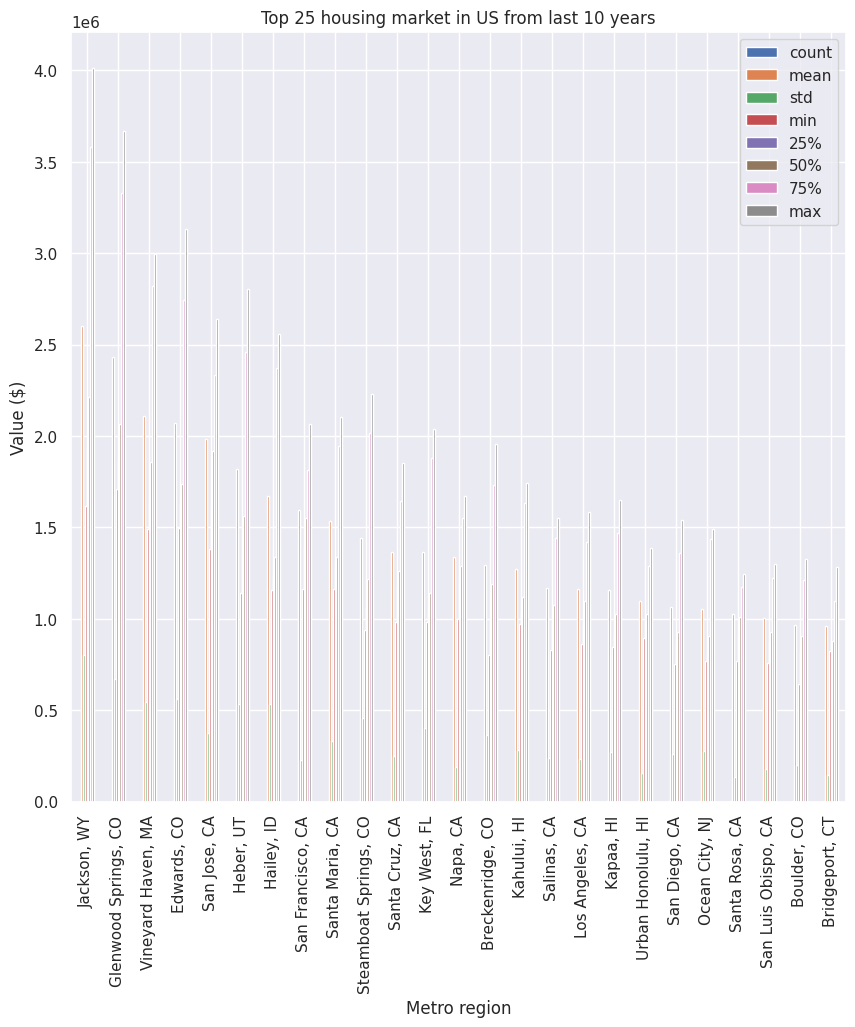

In [24]:
top_25_list_analysis.plot(kind='bar', figsize=(10,10))
plt.title('Top 25 housing market in US from last 10 years')
plt.ylabel('Value ($)')
plt.xlabel('Metro region')

In [25]:
# Top 25 dataframe:
top_25_df = last_ten_years_metro_data.T[top_25_list_analysis.index]

# Add United States for comparison:
top_25_df['United States'] = last_ten_years_metro_data.loc['United States']
top_25_df

RegionName,"Jackson, WY","Glenwood Springs, CO","Vineyard Haven, MA","Edwards, CO","San Jose, CA","Heber, UT","Hailey, ID","San Francisco, CA","Santa Maria, CA","Steamboat Springs, CO",...,"Los Angeles, CA","Kapaa, HI","Urban Honolulu, HI","San Diego, CA","Ocean City, NJ","Santa Rosa, CA","San Luis Obispo, CA","Boulder, CO","Bridgeport, CT",United States
2014-11-30,1.617092e+06,1.711403e+06,1.491207e+06,1.498583e+06,1.378980e+06,1.139297e+06,1.155222e+06,1.159958e+06,1.161766e+06,9.400859e+05,...,8.819375e+05,8.466452e+05,8.950216e+05,7.535746e+05,7.840441e+05,7.690643e+05,7.600225e+05,6.444154e+05,8.716914e+05,383173.851903
2014-12-31,1.632974e+06,1.720627e+06,1.490998e+06,1.501019e+06,1.409377e+06,1.144735e+06,1.155522e+06,1.173009e+06,1.173270e+06,9.414843e+05,...,8.917755e+05,8.505426e+05,8.959725e+05,7.585563e+05,7.847789e+05,7.754851e+05,7.672350e+05,6.485687e+05,8.721134e+05,384678.141281
2015-01-31,1.651915e+06,1.729963e+06,1.492291e+06,1.506195e+06,1.436612e+06,1.153489e+06,1.159647e+06,1.188505e+06,1.182802e+06,9.443114e+05,...,8.991541e+05,8.521415e+05,8.984728e+05,7.638773e+05,7.829043e+05,7.836090e+05,7.748252e+05,6.545845e+05,8.737194e+05,386547.866216
2015-02-28,1.666725e+06,1.742505e+06,1.492701e+06,1.512682e+06,1.456716e+06,1.167078e+06,1.166792e+06,1.204791e+06,1.190432e+06,9.465742e+05,...,9.027458e+05,8.568407e+05,9.014198e+05,7.690906e+05,7.796337e+05,7.919774e+05,7.819281e+05,6.611385e+05,8.747134e+05,388426.128046
2015-03-31,1.681158e+06,1.758913e+06,1.496599e+06,1.518425e+06,1.468929e+06,1.183690e+06,1.177826e+06,1.220455e+06,1.194911e+06,9.499776e+05,...,9.031988e+05,8.616697e+05,9.041274e+05,7.735314e+05,7.751906e+05,8.001051e+05,7.871727e+05,6.686781e+05,8.782094e+05,390296.164145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,3.992887e+06,3.536781e+06,2.957411e+06,3.060744e+06,2.548022e+06,2.577072e+06,2.514774e+06,1.876839e+06,2.082600e+06,2.161726e+06,...,1.551836e+06,1.631169e+06,1.318567e+06,1.536238e+06,1.460466e+06,1.198909e+06,1.299871e+06,1.220699e+06,1.273417e+06,674632.909163
2024-07-31,3.946338e+06,3.568441e+06,2.941489e+06,3.075059e+06,2.570504e+06,2.565263e+06,2.514770e+06,1.880246e+06,2.086244e+06,2.169863e+06,...,1.557527e+06,1.637696e+06,1.314568e+06,1.538632e+06,1.459583e+06,1.195302e+06,1.298902e+06,1.214814e+06,1.273721e+06,675257.201683
2024-08-31,3.903833e+06,3.604391e+06,2.932812e+06,3.092453e+06,2.591966e+06,2.554623e+06,2.516292e+06,1.878437e+06,2.089348e+06,2.182999e+06,...,1.564954e+06,1.643275e+06,1.311578e+06,1.537317e+06,1.461231e+06,1.191768e+06,1.298948e+06,1.210394e+06,1.274094e+06,675970.419296
2024-09-30,3.895642e+06,3.643856e+06,2.942363e+06,3.116613e+06,2.617204e+06,2.555176e+06,2.524810e+06,1.878028e+06,2.098580e+06,2.207551e+06,...,1.576026e+06,1.648224e+06,1.313258e+06,1.536367e+06,1.470035e+06,1.190610e+06,1.300218e+06,1.210579e+06,1.276992e+06,677375.380044


__Detecting Outliers__

<Axes: xlabel='United States'>

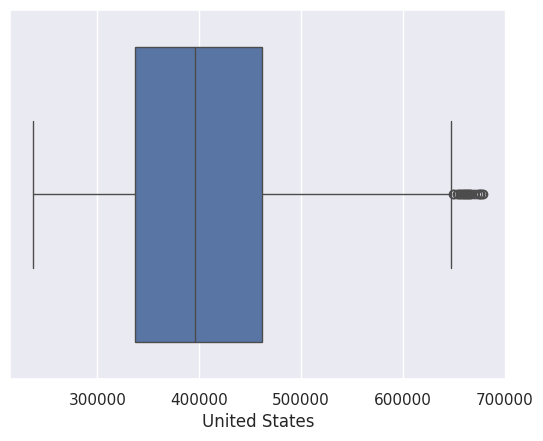

In [26]:
sns.boxplot(x=metro_us_top_tier.loc['United States'])

<Axes: xlabel='United States'>

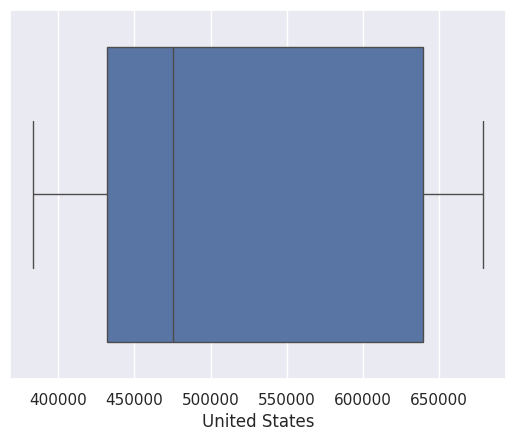

In [27]:
sns.boxplot(x=last_ten_years_metro_data.loc['United States'])

<Axes: xlabel='Jackson, WY'>

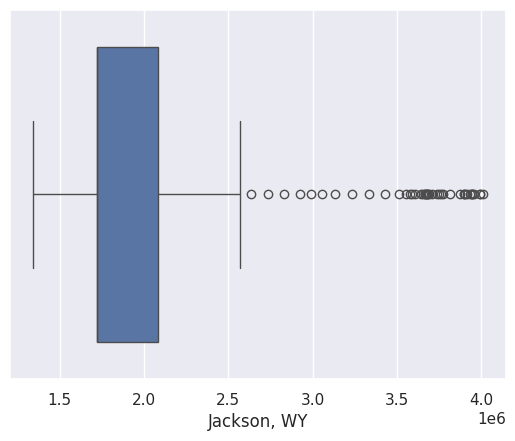

In [28]:
sns.boxplot(x=metro_us_top_tier.loc['Jackson, WY']) # All data since 2000

<Axes: xlabel='Jackson, WY'>

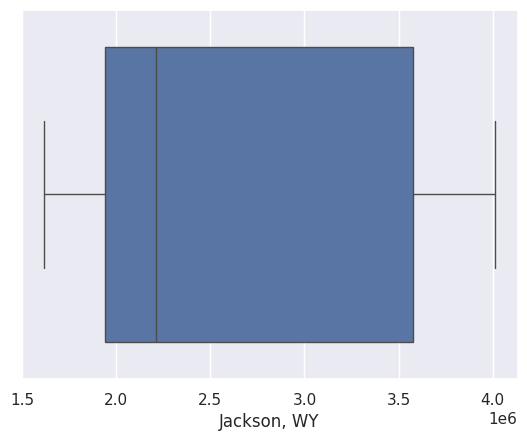

In [29]:
sns.boxplot(x=last_ten_years_metro_data.loc['Jackson, WY'])

Although the data since 2000 shows outliers for higher range, looking at the box plot for `US` and `Jackson, WY`'s data from last 10 years, the housing trend seems to be inside the IQR. This makes sense because of surge of housing market in general after 2020.

In [30]:
Q1 = top_25_df.quantile(0.25)
Q3 = top_25_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RegionName
Jackson, WY              1.639620e+06
Glenwood Springs, CO     1.451283e+06
Vineyard Haven, MA       1.183281e+06
Edwards, CO              1.108056e+06
San Jose, CA             7.203927e+05
Heber, UT                1.099490e+06
Hailey, ID               1.134227e+06
San Francisco, CA        4.179062e+05
Santa Maria, CA          6.502366e+05
Steamboat Springs, CO    9.446740e+05
Santa Cruz, CA           4.614101e+05
Key West, FL             8.299367e+05
Napa, CA                 3.508064e+05
Breckenridge, CO         7.307027e+05
Kahului, HI              5.996192e+05
Salinas, CA              4.598422e+05
Los Angeles, CA          4.496898e+05
Kapaa, HI                5.446788e+05
Urban Honolulu, HI       3.050923e+05
San Diego, CA            4.975523e+05
Ocean City, NJ           6.176585e+05
Santa Rosa, CA           2.545225e+05
San Luis Obispo, CA      3.422724e+05
Boulder, CO              3.794440e+05
Bridgeport, CT           2.323582e+05
United States            2.069438e+05
d

In [31]:
df = top_25_df
print("Initial shape: ", df.shape)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

Initial shape:  (120, 26)


(120, 26)

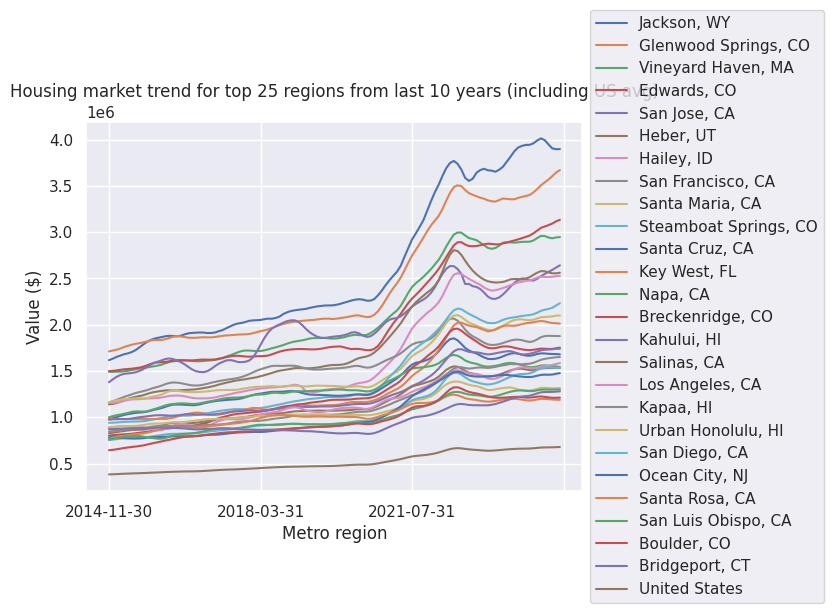

In [32]:
top_25_df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Housing market trend for top 25 regions from last 10 years (including US avg)')
plt.ylabel('Value ($)')
plt.xlabel('Metro region')

# Setting the number of ticks 
plt.locator_params(axis='x', nbins=8)

plt.show()

---
---

## 2. Data Type: ZHVI Single-Family Homes Time Series($)
## Geography: Metro and US.

Now, we are going to perform the exact same steps as we did above in `All Homes - Top Tier Time Series($)`.

In [33]:
# load data into pandas dataframe
sfr_df = pd.read_csv("./Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")

# display first five rows of data
print("First 5 data:")
display(sfr_df.head(5))  

# display last five rows of data
print("Last 5 data:")
display(sfr_df.tail(5))

print("Data Types:")
display(sfr_df.dtypes)

First 5 data:


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,121531.336651,121738.651072,121995.876446,122548.308184,123184.186238,...,350593.674816,351419.563807,352981.682891,354901.213108,356405.219291,357054.866170,357269.495250,357556.470130,358047.728564,358695.400157
1,394913,1,"New York, NY",msa,NY,215526.347853,216437.299774,217353.388393,219206.206623,221115.123983,...,653024.167946,657325.710093,662976.463941,669457.862304,674379.010648,677580.634957,680209.743078,683834.502366,687956.181425,691747.775297
2,753899,2,"Los Angeles, CA",msa,CA,228840.318549,229713.653329,230850.552728,233116.339880,235575.321729,...,961240.278183,958067.128774,956942.083361,960982.286878,967579.982979,972048.452546,976772.555536,982347.195293,989199.485026,994897.480686
3,394463,3,"Chicago, IL",msa,IL,156308.333980,156460.092041,156739.556227,157434.724023,158265.478146,...,323407.920786,325014.621277,327666.811355,330756.679881,333074.201792,334422.582458,335234.282077,336199.561203,337340.532590,338506.114351
4,394514,4,"Dallas, TX",msa,TX,126045.193158,126100.940737,126169.731762,126344.177104,126568.833701,...,371215.184232,371698.224857,372852.439583,373826.243574,373978.341627,373322.949324,372396.923106,371759.173084,371580.012878,371494.296639


Last 5 data:


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,125505.480365,124620.859170,124703.453283,126217.346418,127940.190271,129029.544547,129216.203575,128841.856015,128169.963134,127248.665154
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,411724.194103,411668.716287,413385.593811,415037.934548,416247.744981,416235.514828,415323.647956,415325.998281,416842.773776,419086.682223
892,753874,937,"Craig, CO",msa,CO,98830.861837,99097.911211,99574.805478,100259.229234,101040.616567,...,285287.949217,285219.875814,285685.290380,286463.285398,287357.918108,287698.710801,288033.677233,288266.115146,289594.833055,291259.120524
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,91184.718655,91281.020656,91975.182494,92739.898571,93395.868423,93641.985168,93402.487663,92893.101563,91612.695630,90013.700765
894,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,88711.311676,87596.741991,87637.262603,87847.018796,88770.521386,90064.663210,91903.350319,93542.740242,94253.311435,94265.128384


Data Types:


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 303, dtype: object

In [34]:
# Cleanup columns
sfr_df = sfr_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
sfr_df.set_index('RegionName', inplace=True)
sfr_df.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,121531.336651,121738.651072,121995.876446,122548.308184,123184.186238,123865.680213,124586.279073,125365.300224,126176.642380,126992.456858,...,350593.674816,351419.563807,352981.682891,354901.213108,356405.219291,357054.866170,357269.495250,357556.470130,358047.728564,358695.400157
"New York, NY",215526.347853,216437.299774,217353.388393,219206.206623,221115.123983,223259.025429,225613.438183,228131.099900,230680.962642,233209.761443,...,653024.167946,657325.710093,662976.463941,669457.862304,674379.010648,677580.634957,680209.743078,683834.502366,687956.181425,691747.775297
"Los Angeles, CA",228840.318549,229713.653329,230850.552728,233116.339880,235575.321729,238017.327535,240515.010731,243005.004934,245342.258175,247423.560181,...,961240.278183,958067.128774,956942.083361,960982.286878,967579.982979,972048.452546,976772.555536,982347.195293,989199.485026,994897.480686
"Chicago, IL",156308.333980,156460.092041,156739.556227,157434.724023,158265.478146,159199.059474,160194.910072,161574.960011,163187.672396,165047.344391,...,323407.920786,325014.621277,327666.811355,330756.679881,333074.201792,334422.582458,335234.282077,336199.561203,337340.532590,338506.114351
"Dallas, TX",126045.193158,126100.940737,126169.731762,126344.177104,126568.833701,126796.407950,127030.425355,127380.246590,127815.924260,128301.186954,...,371215.184232,371698.224857,372852.439583,373826.243574,373978.341627,373322.949324,372396.923106,371759.173084,371580.012878,371494.296639


In [35]:
# Check for duplicates
dup_df = sfr_df[sfr_df.duplicated()]
print("number of duplicate rows: ", dup_df.shape)

number of duplicate rows:  (0, 298)


In [36]:
# Cleanup null data
print(sfr_df.isnull().sum())

2000-01-31    464
2000-02-29    463
2000-03-31    462
2000-04-30    460
2000-05-31    458
             ... 
2024-06-30      0
2024-07-31      0
2024-08-31      0
2024-09-30      0
2024-10-31      0
Length: 298, dtype: int64


In [37]:
# Similar to previous data, we need to backfill missing data
sfr_df.bfill(axis=1, inplace=True)
print(sfr_df.isnull().sum())

2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
2000-05-31    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 298, dtype: int64


In [38]:
# Descriptive statistics for last 10 years of data
# View details in previous data analysis in step 1 for more details.
last_ten_years_sfr_metro_data = sfr_df.iloc[:,-120:]
descriptive_analysis_sfr_df = last_ten_years_sfr_metro_data.T.describe()
sorted_sfr_df = descriptive_analysis_sfr_df.T.sort_values(by=['mean', 'std'],ascending=[False, True])
top_25_sfr_list_analysis = sorted_sfr_df.head(25)
top_25_sfr_list_analysis

,count,mean,std,min,25%,50%,75%,max
RegionName,,,,,,,,
"San Jose, CA",120.0,1.227770e+06,267761.480380,797728.285666,960762.412575,1.198467e+06,1.471244e+06,1.702743e+06
"Jackson, WY",120.0,1.027722e+06,343449.306049,598841.658036,752370.337884,8.632563e+05,1.457562e+06,1.627873e+06
"Vineyard Haven, MA",120.0,1.017045e+06,298184.783358,670733.689937,761675.171617,8.890117e+05,1.381567e+06,1.528388e+06
"Breckenridge, CO",120.0,1.012145e+06,296715.646988,607037.371220,770032.918989,9.339546e+05,1.365240e+06,1.544412e+06
"San Francisco, CA",120.0,9.975818e+05,178554.888295,669164.710363,844554.899866,9.651118e+05,1.173840e+06,1.322396e+06
"Edwards, CO",120.0,9.496837e+05,300340.623304,609277.848856,716201.581925,8.020417e+05,1.302244e+06,1.535533e+06
"Santa Cruz, CA",120.0,9.238488e+05,190722.600565,621639.338449,775343.533615,8.518331e+05,1.135772e+06,1.262473e+06
"Urban Honolulu, HI",120.0,8.490712e+05,137494.628288,656734.967712,747023.072934,7.945712e+05,1.024892e+06,1.087724e+06
"Steamboat Springs, CO",120.0,8.247768e+05,275754.640298,495552.061851,602122.468676,7.028160e+05,1.163190e+06,1.312827e+06


Text(0.5, 0, 'Metro region')

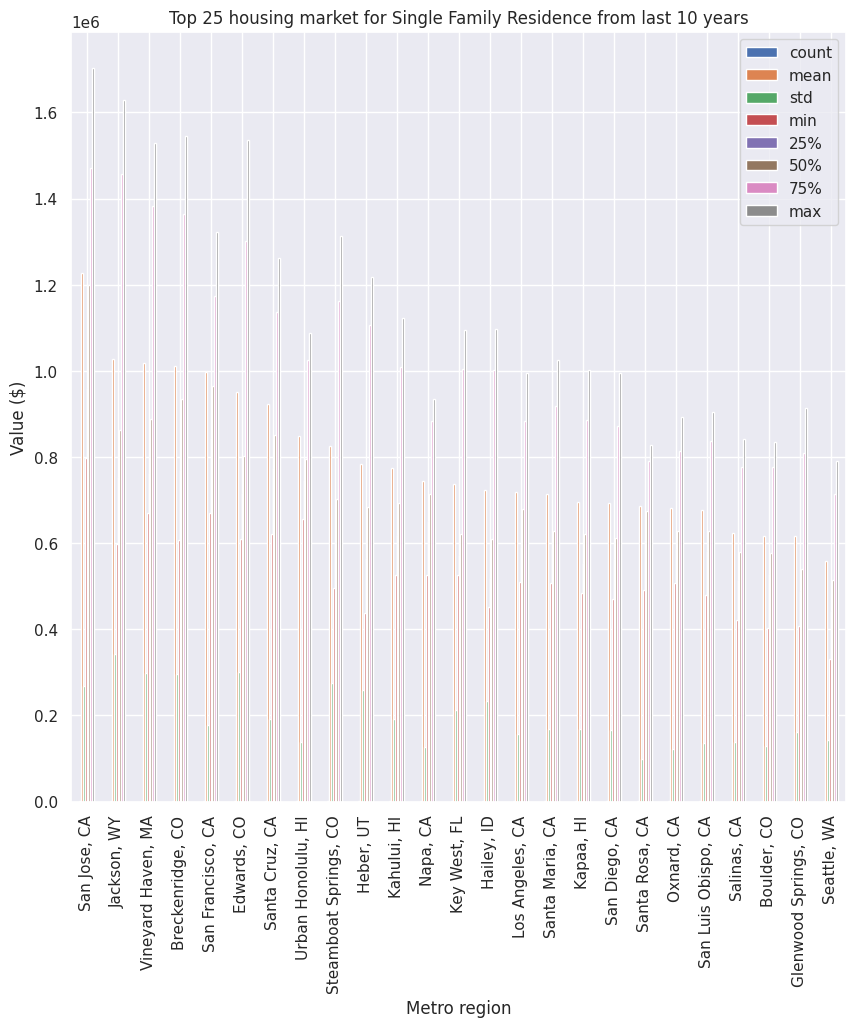

In [39]:
# Bar chart
top_25_sfr_list_analysis.plot(kind='bar', figsize=(10,10))
plt.title('Top 25 housing market for Single Family Residence from last 10 years')
plt.ylabel('Value ($)')
plt.xlabel('Metro region')

In [40]:
# Top 25 dataframe:
top_25_sfr_df = last_ten_years_sfr_metro_data.T[top_25_sfr_list_analysis.index]

# Add United States for comparison:
top_25_sfr_df['United States'] = last_ten_years_sfr_metro_data.loc['United States']
top_25_sfr_df

RegionName,"San Jose, CA","Jackson, WY","Vineyard Haven, MA","Breckenridge, CO","San Francisco, CA","Edwards, CO","Santa Cruz, CA","Urban Honolulu, HI","Steamboat Springs, CO","Heber, UT",...,"Kapaa, HI","San Diego, CA","Santa Rosa, CA","Oxnard, CA","San Luis Obispo, CA","Salinas, CA","Boulder, CO","Glenwood Springs, CO","Seattle, WA",United States
2014-11-30,7.977283e+05,5.988417e+05,6.707337e+05,6.070374e+05,6.691647e+05,6.092778e+05,6.216393e+05,6.567350e+05,4.955521e+05,4.379330e+05,...,4.832179e+05,470137.968734,492145.182379,506802.415334,480130.845483,422078.949928,401948.492560,406705.690365,332009.292636,183119.477734
2014-12-31,8.129893e+05,6.051410e+05,6.712370e+05,6.104846e+05,6.763180e+05,6.116896e+05,6.286417e+05,6.578930e+05,4.975340e+05,4.411798e+05,...,4.859857e+05,473230.961709,495562.044744,508816.648047,484630.580138,423980.699058,404738.599033,409667.606292,334643.189694,183749.122476
2015-01-31,8.264284e+05,6.115475e+05,6.721315e+05,6.129583e+05,6.849462e+05,6.141527e+05,6.359017e+05,6.601115e+05,4.994614e+05,4.451816e+05,...,4.879561e+05,476788.301589,500164.705131,511276.545224,489153.457991,425117.340890,408678.362882,413348.993768,338174.375622,184535.969904
2015-02-28,8.365256e+05,6.164900e+05,6.731938e+05,6.149740e+05,6.943245e+05,6.174458e+05,6.443133e+05,6.627933e+05,5.013914e+05,4.509419e+05,...,4.912250e+05,480656.664234,505634.544965,514370.416674,493499.290948,427308.048779,413209.637536,417826.766668,342098.571710,185330.314211
2015-03-31,8.423841e+05,6.215188e+05,6.748560e+05,6.178346e+05,7.036024e+05,6.208437e+05,6.511477e+05,6.651091e+05,5.037327e+05,4.575501e+05,...,4.943015e+05,484356.946989,511360.059947,517757.081661,497053.385575,429229.680051,418272.957146,423015.758996,345746.506786,186140.654880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,1.645861e+06,1.623897e+06,1.528388e+06,1.383134e+06,1.231113e+06,1.496410e+06,1.189461e+06,1.047280e+06,1.274767e+06,1.158544e+06,...,9.917911e+05,993451.496153,821640.284768,888444.399012,902358.768271,837110.519943,785871.479074,899522.573554,761965.250257,357054.866170
2024-07-31,1.662261e+06,1.611548e+06,1.524474e+06,1.382251e+06,1.234249e+06,1.507545e+06,1.188875e+06,1.045014e+06,1.279373e+06,1.154122e+06,...,9.963030e+05,994946.104302,820549.142884,890788.459075,903034.281181,839584.074191,783281.235107,901702.297963,763152.773547,357269.495250
2024-08-31,1.676799e+06,1.600794e+06,1.521817e+06,1.383335e+06,1.232985e+06,1.517310e+06,1.189054e+06,1.043513e+06,1.286411e+06,1.151417e+06,...,9.996661e+05,994352.364898,819340.770603,891976.864321,903490.106956,840308.572337,781656.310157,904829.568594,764192.349569,357556.470130
2024-09-30,1.690593e+06,1.599956e+06,1.525980e+06,1.389037e+06,1.230762e+06,1.528688e+06,1.188908e+06,1.045277e+06,1.300061e+06,1.152907e+06,...,1.001037e+06,993706.241079,819051.319335,893076.005802,904151.975252,841273.035972,782104.363124,909907.850763,766999.120177,358047.728564


<Axes: xlabel='San Jose, CA'>

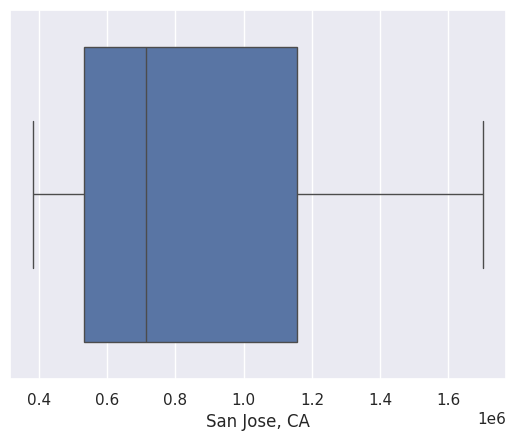

In [41]:
# Checking outliers
sns.boxplot(x=sfr_df.loc['San Jose, CA']) # All data since 2000

<Axes: xlabel='San Jose, CA'>

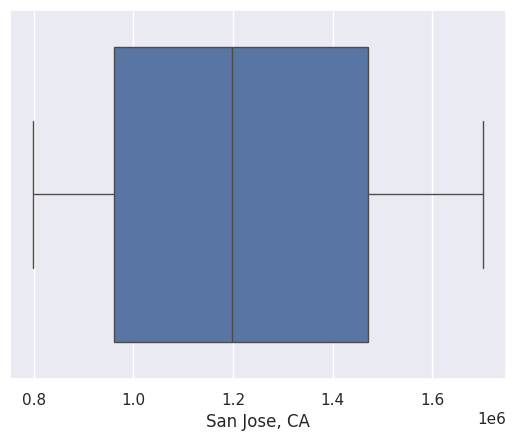

In [42]:
# Checking outliers
sns.boxplot(x=last_ten_years_sfr_metro_data.loc['San Jose, CA']) # Last 10 year's data

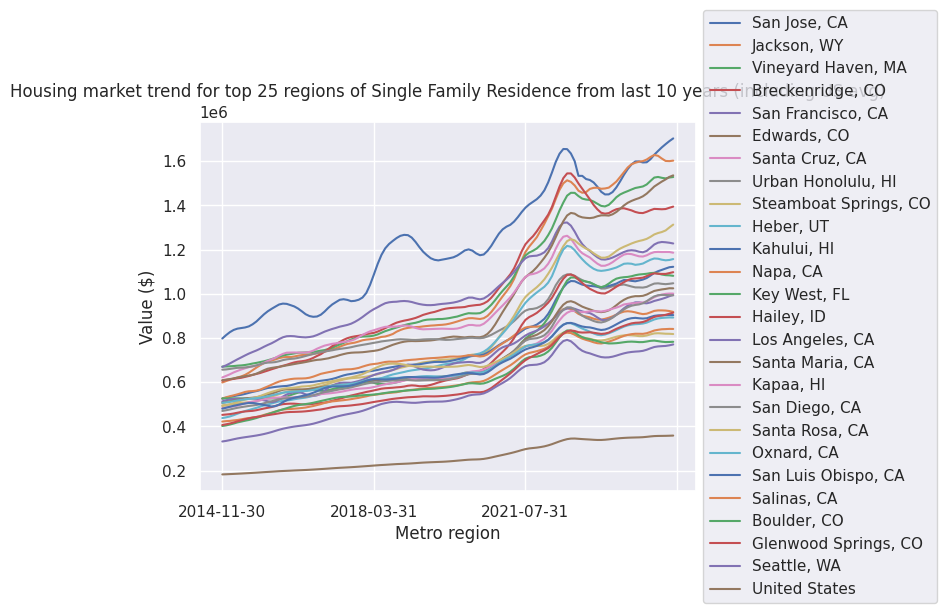

In [43]:
# Trend for top 25 market
top_25_sfr_df.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Housing market trend for top 25 regions of Single Family Residence from last 10 years (including US avg)')
plt.ylabel('Value ($)')
plt.xlabel('Metro region')

# Setting the number of ticks 
plt.locator_params(axis='x', nbins=8) 

plt.show()

In [44]:
# Uncomment to install tabulate and/or create markdown to be copied to conclusion
# !pip install tabulate
# print(top_25_list_analysis.loc[:, ['mean','std']].to_markdown()) # From all houses
# print(top_25_sfr_list_analysis.loc[:, ['mean','std']].to_markdown())

## Conclusion:

Here are the list of top 25 housing market that are doing well overall.

### Top 25 All Housing market (Includes Single Family Residence and Condos)
| RegionName            |             mean |    std |
|:----------------------|-----------------:|-------:|
| Jackson, WY           |      2.59957e+06 | 801671 |
| Glenwood Springs, CO  |      2.43306e+06 | 670266 |
| Vineyard Haven, MA    |      2.11046e+06 | 543758 |
| Edwards, CO           |      2.06951e+06 | 559886 |
| San Jose, CA          |      1.98135e+06 | 377474 |
| Heber, UT             |      1.81709e+06 | 534465 |
| Hailey, ID            |      1.67035e+06 | 532237 |
| San Francisco, CA     |      1.59217e+06 | 229502 |
| Santa Maria, CA       |      1.53504e+06 | 330266 |
| Steamboat Springs, CO |      1.44105e+06 | 455912 |
| Santa Cruz, CA        |      1.36547e+06 | 248359 |
| Key West, FL          |      1.36303e+06 | 402685 |
| Napa, CA              |      1.33953e+06 | 190744 |
| Breckenridge, CO      |      1.29232e+06 | 365414 |
| Kahului, HI           |      1.27069e+06 | 280592 |
| Salinas, CA           |      1.16843e+06 | 237667 |
| Los Angeles, CA       |      1.16478e+06 | 234546 |
| Kapaa, HI             |      1.15683e+06 | 269255 |
| Urban Honolulu, HI    |      1.09775e+06 | 155236 |
| San Diego, CA         |      1.06392e+06 | 258233 |
| Ocean City, NJ        |      1.05362e+06 | 276310 |
| Santa Rosa, CA        |      1.02831e+06 | 133822 |
| San Luis Obispo, CA   |      1.00375e+06 | 179990 |
| Boulder, CO           | 967842           | 197576 |
| Bridgeport, CT        | 962255           | 144675 |

### Top 25 Single Family Residence housing market

| RegionName            |             mean |      std |
|:----------------------|-----------------:|---------:|
| San Jose, CA          |      1.22777e+06 | 267761   |
| Jackson, WY           |      1.02772e+06 | 343449   |
| Vineyard Haven, MA    |      1.01704e+06 | 298185   |
| Breckenridge, CO      |      1.01214e+06 | 296716   |
| San Francisco, CA     | 997582           | 178555   |
| Edwards, CO           | 949684           | 300341   |
| Santa Cruz, CA        | 923849           | 190723   |
| Urban Honolulu, HI    | 849071           | 137495   |
| Steamboat Springs, CO | 824777           | 275755   |
| Heber, UT             | 784485           | 258184   |
| Kahului, HI           | 774397           | 190472   |
| Napa, CA              | 744594           | 125742   |
| Key West, FL          | 738031           | 212630   |
| Hailey, ID            | 722814           | 232838   |
| Los Angeles, CA       | 719565           | 156142   |
| Santa Maria, CA       | 715098           | 169254   |
| Kapaa, HI             | 695026           | 167550   |
| San Diego, CA         | 692270           | 165706   |
| Santa Rosa, CA        | 685695           |  98524.8 |
| Oxnard, CA            | 680779           | 123017   |
| San Luis Obispo, CA   | 676830           | 136815   |
| Salinas, CA           | 624332           | 137029   |
| Boulder, CO           | 616570           | 127961   |
| Glenwood Springs, CO  | 615993           | 161010   |
| Seattle, WA           | 558299           | 142944   |